# Exploratory Data Analysis (EDA)

This notebook summarizes the analysis of job market data using modular scripts.

## Modules:
- `load_data.py`: load and clean datasets
- `tech_skills_analysis.py`: extract and categorize tech skills
- `soft_skills_analysis.py`: count and group soft skills
- `action_verbs.py`: extract base-form action verbs


## 1. Setup and Imports

We begin by importing the necessary libraries and loading helper functions from custom modules. These modules handle data loading, salary parsing, and skill extraction.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from Scripts.load_data import load_and_prepare_data, extract_salary_range, normalize_salary
from Scripts.tech_skills_analysis import extract_tech_skills, categorize_skills
from Scripts.soft_skills_analysis import count_soft_skills
from Scripts.action_verbs import extract_action_verbs

sns.set(style='whitegrid')

## 2. Load and Prepare Data

We load the cleaned dataset and prepare a few filtered subsets:

- `df`: Full dataset with salary columns extracted and normalized.
- `salary_df`: Subset containing only rows with valid salary estimates.
- `description_df`: Subset with valid job descriptions for NLP and skill analysis.


In [2]:
df = load_and_prepare_data(job_path='../data/processed/job_market_data.csv')

## 3. Univariate Analysis

Here we explore the distribution of job titles, companies, job types, and salaries to identify key trends in the job market.


In [12]:
# Top 10 most common job titles
top_titles = df['Title'].value_counts().nlargest(10)

# Top 10 most common hiring companies
top_companies = df['Company'].value_counts().nlargest(10)

### Top 10 Job Titles
This bar chart shows the most frequently listed job titles across all postings.


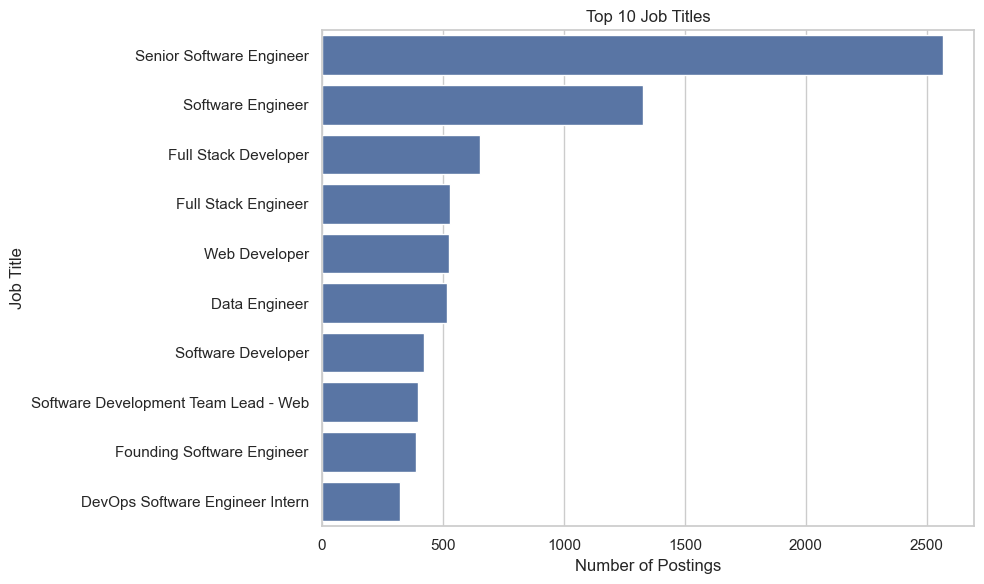

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.title("Top 10 Job Titles")
plt.xlabel("Number of Postings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

### Top 10 Hiring Companies
These are the companies with the most job listings in the dataset.


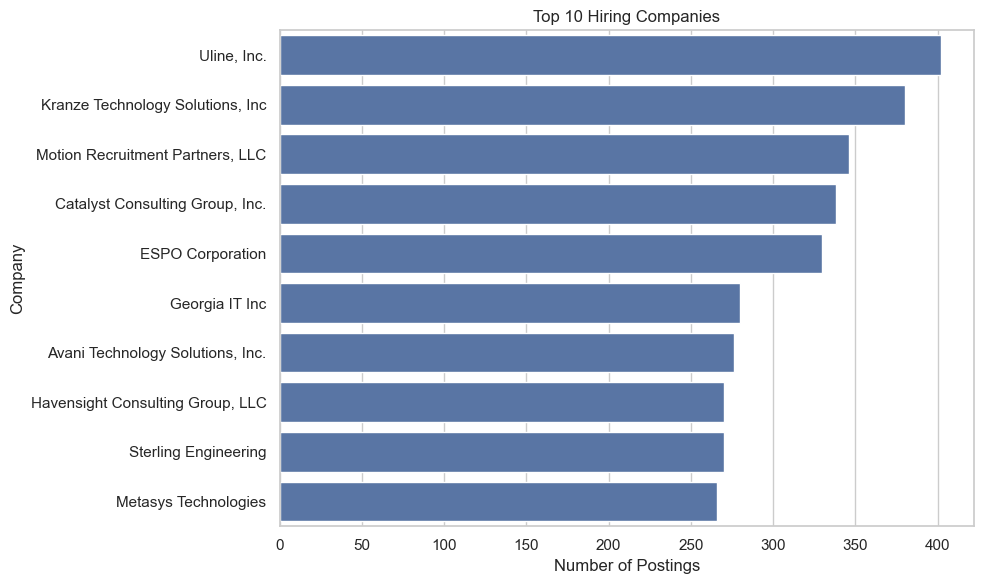

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_companies.index, x=top_companies.values)
plt.title("Top 10 Hiring Companies")
plt.xlabel("Number of Postings")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


In [15]:
job_type_counts = df['Job_Type'].value_counts()

In [4]:
# Extract salary ranges
df[['min_salary', 'max_salary']] = df['Salary'].apply(extract_salary_range)

# Normalize salaries
df['min_salary'] = df['min_salary'].apply(normalize_salary)
df['max_salary'] = df['max_salary'].apply(normalize_salary)

# Compute average salary
df['avg_salary'] = df[['min_salary', 'max_salary']].mean(axis=1)

In [5]:
# Only rows with valid salary data
salary_df = df[df['avg_salary'].notna() & (df['avg_salary'] > 0)].copy()

# Only rows with non-empty descriptions
description_df = df[df['Description_clean'].notna() & (df['Description_clean'].str.strip() != '')].copy()

In [6]:
print(df['Title'].value_counts().head(10))
print(df['Company'].value_counts().head(10))

Title
Senior Software Engineer                2566
Software Engineer                       1328
Full Stack Developer                     652
Full Stack Engineer                      528
Web Developer                            526
Data Engineer                            516
Software Developer                       421
Software Development Team Lead - Web     398
Founding Software Engineer               387
DevOps Software Engineer Intern          324
Name: count, dtype: int64
Company
Uline, Inc.                         402
Kranze Technology Solutions, Inc    380
Motion Recruitment Partners, LLC    346
Catalyst Consulting Group, Inc.     338
ESPO Corporation                    330
Georgia IT Inc                      280
Avani Technology Solutions, Inc.    276
Havensight Consulting Group, LLC    270
Sterling Engineering                270
Metasys Technologies                266
Name: count, dtype: int64


### Salary Distribution
Box plot and histogram provide insight into the spread and skew of salary ranges.

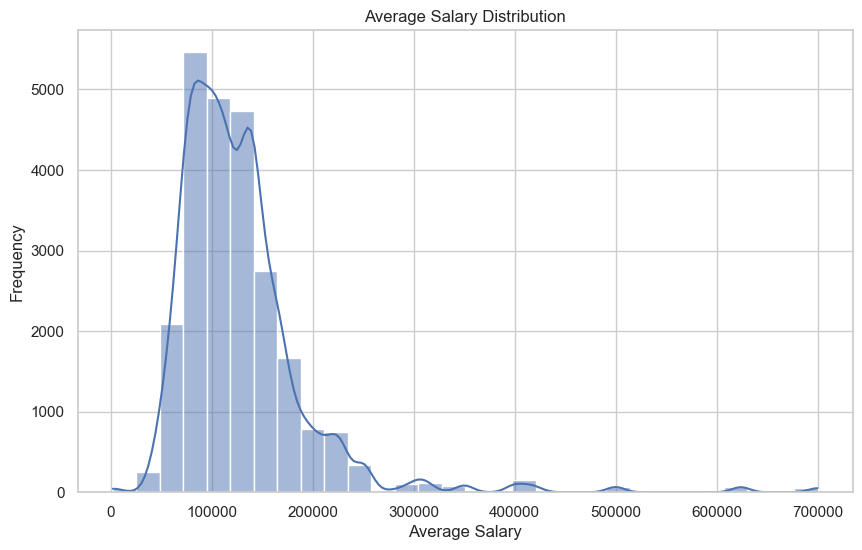

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(salary_df['avg_salary'], bins=30, kde=True)
plt.title('Average Salary Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

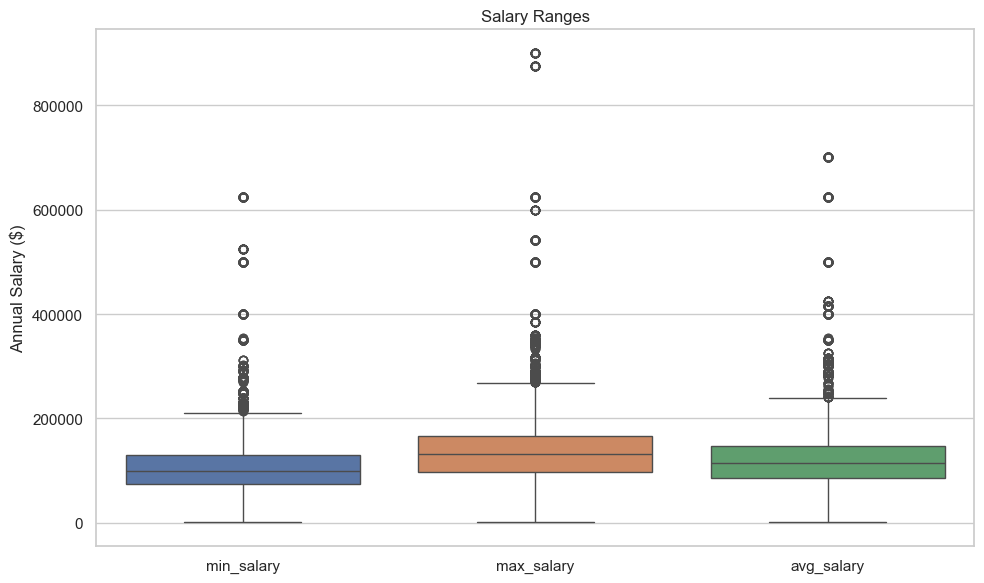

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df[['min_salary', 'max_salary', 'avg_salary']])
plt.title("Salary Ranges")
plt.ylabel("Annual Salary ($)")
plt.tight_layout()
plt.show()

## 4. Technical Skill Mentions

We extract and categorize mentions of technical skills using regex pattern matching. These insights reveal what programming languages, tools, and technologies are most in demand.


In [20]:
tech_skills_df = extract_tech_skills(description_df)
categorized_skills_df = categorize_skills(tech_skills_df)

categorized_skills_df.loc[categorized_skills_df['Skill'] == 'r', 'Mentions'] = 570
categorized_skills_df.loc[categorized_skills_df['Skill'] == 'go', 'Mentions'] = 4245
categorized_skills_df.loc[categorized_skills_df['Skill'] == 'typescript', 'Mentions'] = 282

categorized_skills_df

,Skill,Mentions,Category
3,excel,8102,BI Tool
19,power bi,1263,BI Tool
23,tableau,646,BI Tool
9,aws,4561,Cloud
11,azure,3999,Cloud
14,gcp,2199,Cloud
5,sql,5878,Database
21,postgresql,859,Database
22,mysql,815,Database
24,mongodb,379,Database


## 5. Soft Skills and Responsibilities

Soft skills were extracted from job descriptions using a curated list of phrases. This helps us understand what personal and professional traits employers are seeking.

In [10]:
soft_skills_df = count_soft_skills(description_df)
soft_skills_df

,Soft Skill / Responsibility,Mentions
0,communication,8666
2,teamwork,3504
1,leadership,3056
5,adaptability,2807
3,problem-solving,1771
7,interpersonal skills,1391
8,customer focus,968
6,critical thinking,415
4,time management,383


In [35]:
# Create a dictionary from the soft_skills_df
soft_skill_dict = dict(zip(soft_skills_df['Soft Skill / Responsibility'], soft_skills_df['Mentions']))

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(soft_skill_dict)

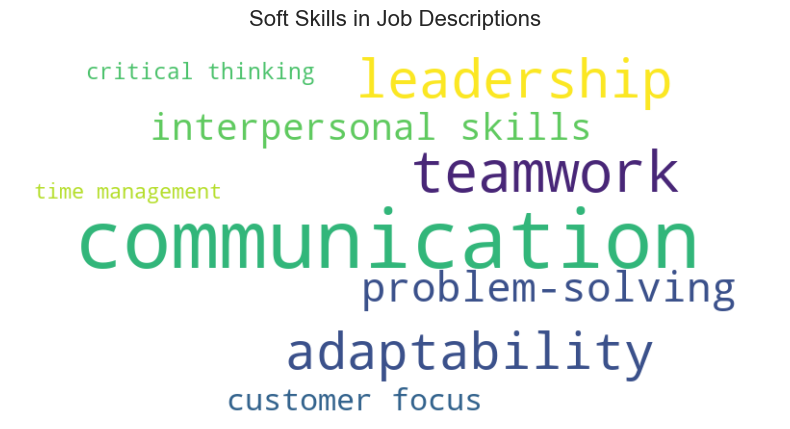

In [36]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Soft Skills in Job Descriptions", fontsize=16)
plt.show()

### Top Skills per Category
Below are the most commonly mentioned skills, grouped by category.

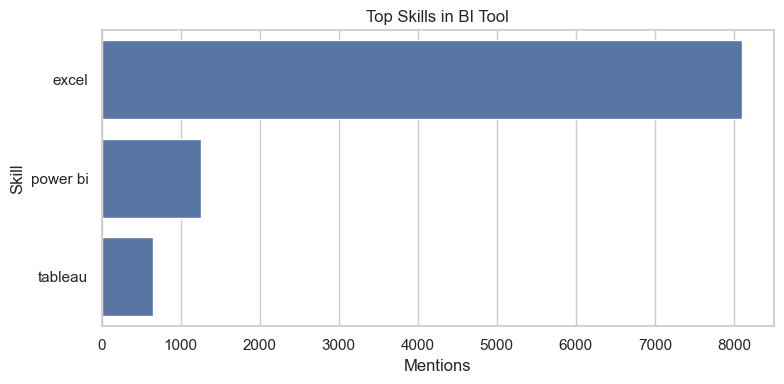

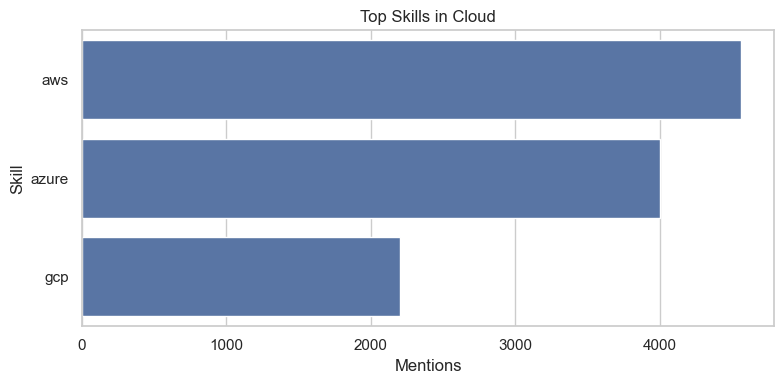

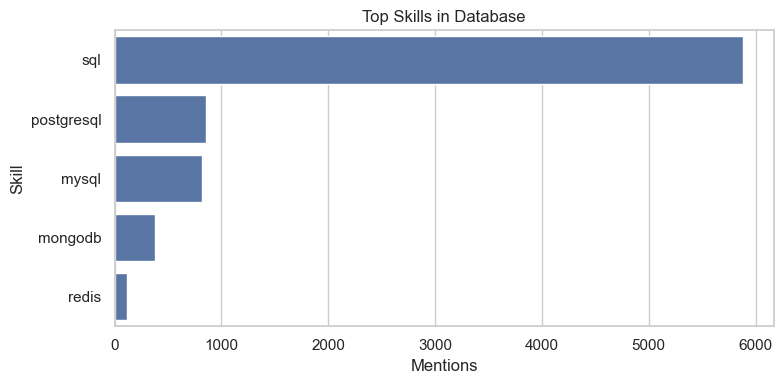

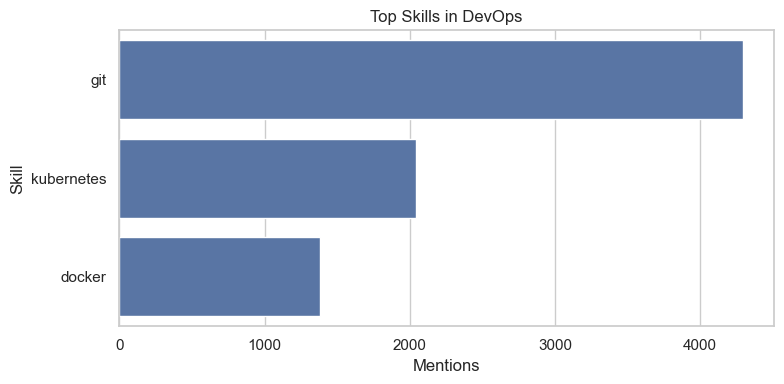

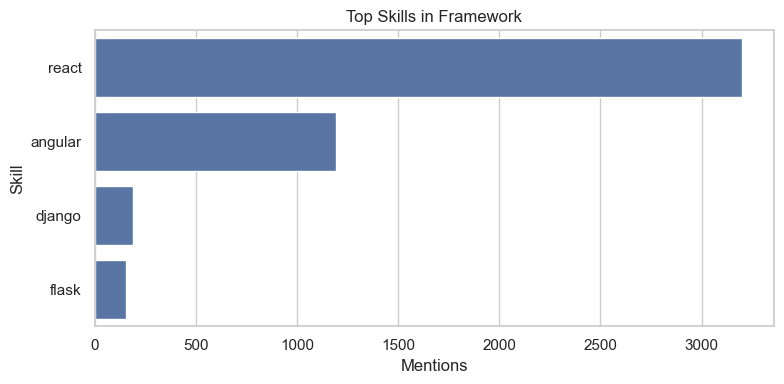

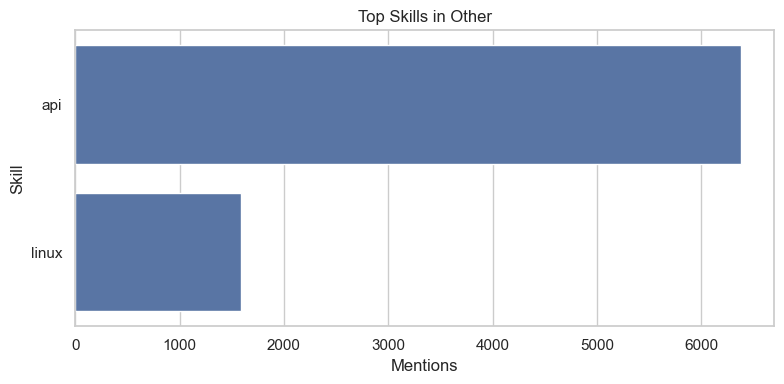

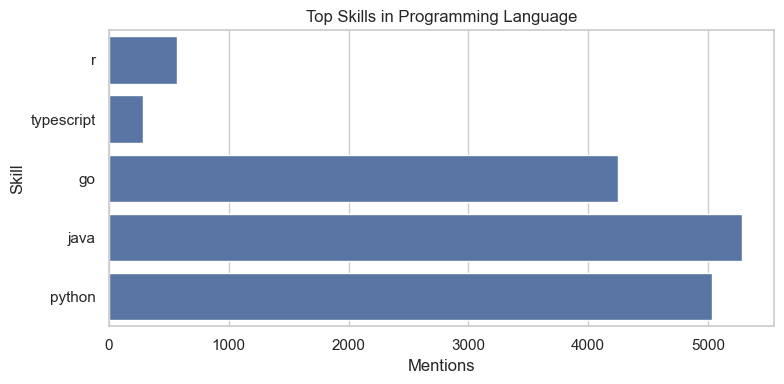

In [21]:
for category in categorized_skills_df['Category'].unique():
    top_skills = categorized_skills_df[categorized_skills_df['Category'] == category].head(5)
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Mentions', y='Skill', data=top_skills)
    plt.title(f"Top Skills in {category}")
    plt.xlabel("Mentions")
    plt.ylabel("Skill")
    plt.tight_layout()
    plt.show()

## 6. Action Verbs in Descriptions

We use natural language processing to identify the most common base-form action verbs in job descriptions, offering insight into role expectations and communication tone.

In [11]:
action_verbs_df = extract_action_verbs(description_df)
action_verbs_df

,Verb,Mentions
0,work,17712
1,including,17554
2,working,13270
3,using,12250
4,ensure,11702
5,develop,11562
6,provide,9847
7,required,9224
8,degree,8325
9,build,7708


In [33]:
# Create a dictionary from the action_verbs_df
verb_dict = dict(zip(action_verbs_df['Verb'], action_verbs_df['Mentions']))

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma'
).generate_from_frequencies(verb_dict)

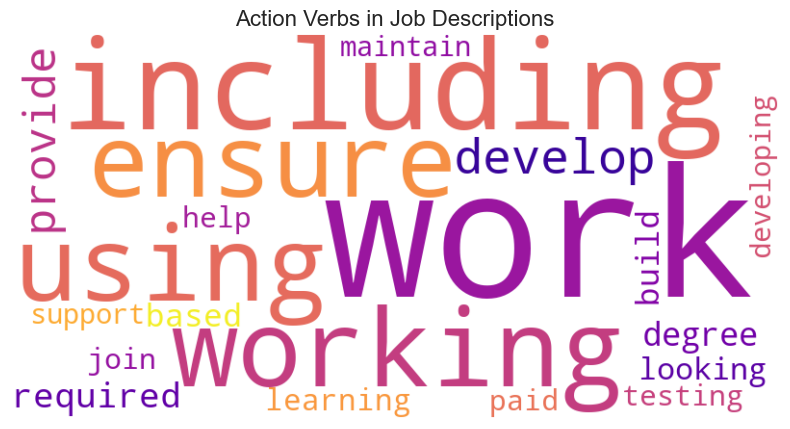

In [34]:
# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Action Verbs in Job Descriptions", fontsize=16)
plt.show()